In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [4]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


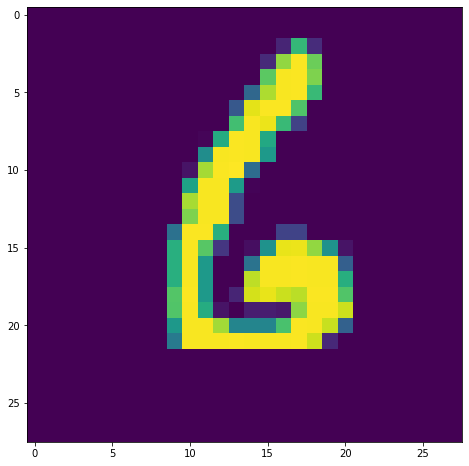

6
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26 170
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  30 214 254
  198   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 253 254
  206   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 224 253 254
  173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  70 245 254 254 185
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 178 253 248 173  50
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3 157 254 253 

In [5]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample])
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [6]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)
x_train = x_train / 255 # minmax 스케일링 : 0~1 사이의 값으로 바꿔주려고
x_test = x_test / 255
print(x_train.shape)

(60000, 784)


In [8]:
model = Sequential()
model.add(Dense(128, input_dim=28*28, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
fit_hist = model.fit(x_train, y_train, batch_size=128,
                     validation_split=0.2, epochs=15, verbose=1)

Epoch 1/15
375/375 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.9024 - val_loss: 0.1664 - val_accuracy: 0.9532
Epoch 2/15
375/375 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.9589 - val_loss: 0.1139 - val_accuracy: 0.9658
Epoch 3/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9711 - val_loss: 0.1019 - val_accuracy: 0.9697
Epoch 4/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0705 - accuracy: 0.9785 - val_loss: 0.0912 - val_accuracy: 0.9727
Epoch 5/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0926 - val_accuracy: 0.9731
Epoch 6/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0889 - val_accuracy: 0.9740
Epoch 7/15
375/375 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0881 - val_accuracy: 0.9753
Epoch 

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final Test set accuracy :', score[1])

Final Test set accuracy : 0.9772999882698059


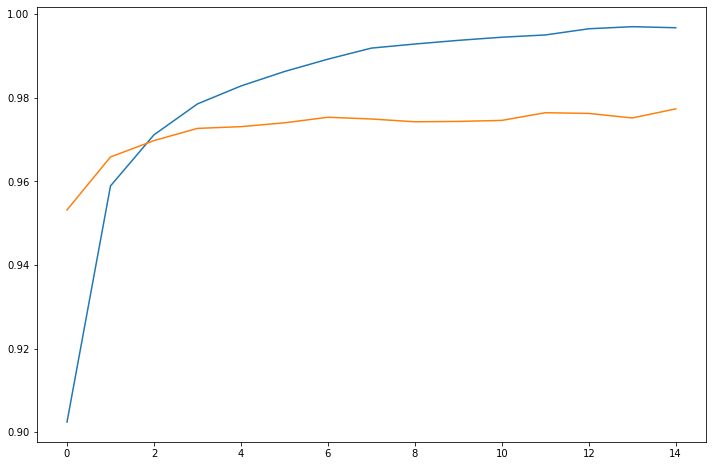

In [12]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

8
[[2.5064485e-11 4.7208924e-11 2.8511735e-08 2.3944488e-06 2.3835883e-17
  8.6027305e-12 6.2045665e-13 7.8088550e-13 9.9999762e-01 2.1931272e-09]]
8


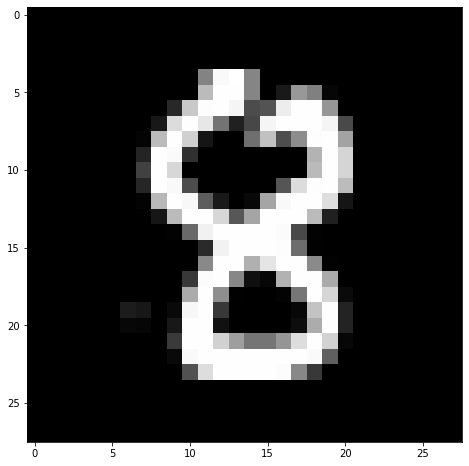

In [13]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')
print(Y_test[my_sample])
pred = model.predict(x_test[my_sample].reshape(-1, 28 * 28))
print(pred)
print(np.argmax(pred))